In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import matplotlib.pyplot as plt

In [3]:
folder = os.path.expanduser('~/SSS_mount/insituCNV/data/simulated_CNV_data/technical_limiting_conditions')

experiments = [1,2,3]
fractions = [100, 70, 50, 20, 10, 5, 3, 2, 1]
gene_panel_sizes = ['all', 20000, 15000, 10000, 5000, 1000, 500]

# Initialize DataFrames to hold the metrics
total_counts_mean_matrix = pd.DataFrame(np.nan, index=gene_panel_sizes, columns=fractions)
n_genes_by_counts_mean_matrix = pd.DataFrame(np.nan, index=gene_panel_sizes, columns=fractions)
n_vars_matrix = pd.DataFrame(np.nan, index=gene_panel_sizes, columns=fractions)

n = 0

for exp in experiments:

    for frac in fractions:
        for panel in gene_panel_sizes:
            n += 1
            name = f'CNV_simulation_0{exp}_subsampled_counts_{frac}_genes_{panel}'
            adata_path = os.path.join(folder, f'{name}.h5ad')
            print(n, f"Processing {name}...")
            
            # Load and prepare data
            adata = sc.read(adata_path)
            adata.X = adata.layers['CNV_simulated_raw'].copy()
            sc.pp.calculate_qc_metrics(adata, inplace=True)
            
            # Extract metrics
            total_counts_mean = adata.obs["total_counts"].mean() 
            n_genes_by_counts_mean = adata.obs["n_genes_by_counts"].mean()
            n_vars = adata.n_vars
            
            # Save metrics
            total_counts_mean_matrix.loc[panel, frac] = total_counts_mean
            n_genes_by_counts_mean_matrix.loc[panel, frac] = n_genes_by_counts_mean
            n_vars_matrix.loc[panel, frac] = n_vars
            
    total_counts_mean_matrix.to_csv(f'sim0{exp}_total_counts_mean_matrix.csv')
    n_genes_by_counts_mean_matrix.to_csv(f'sim0{exp}_n_genes_by_counts_mean_matrix.csv')
    n_vars_matrix.to_csv(f'sim0{exp}_n_vars_matrix.csv')
    print(total_counts_mean_matrix)


1 Processing CNV_simulation_01_subsampled_counts_100_genes_all...
2 Processing CNV_simulation_01_subsampled_counts_100_genes_20000...
3 Processing CNV_simulation_01_subsampled_counts_100_genes_15000...
4 Processing CNV_simulation_01_subsampled_counts_100_genes_10000...
5 Processing CNV_simulation_01_subsampled_counts_100_genes_5000...
6 Processing CNV_simulation_01_subsampled_counts_100_genes_1000...
7 Processing CNV_simulation_01_subsampled_counts_100_genes_500...
8 Processing CNV_simulation_01_subsampled_counts_70_genes_all...
9 Processing CNV_simulation_01_subsampled_counts_70_genes_20000...
10 Processing CNV_simulation_01_subsampled_counts_70_genes_15000...
11 Processing CNV_simulation_01_subsampled_counts_70_genes_10000...
12 Processing CNV_simulation_01_subsampled_counts_70_genes_5000...
13 Processing CNV_simulation_01_subsampled_counts_70_genes_1000...
14 Processing CNV_simulation_01_subsampled_counts_70_genes_500...
15 Processing CNV_simulation_01_subsampled_counts_50_genes_all

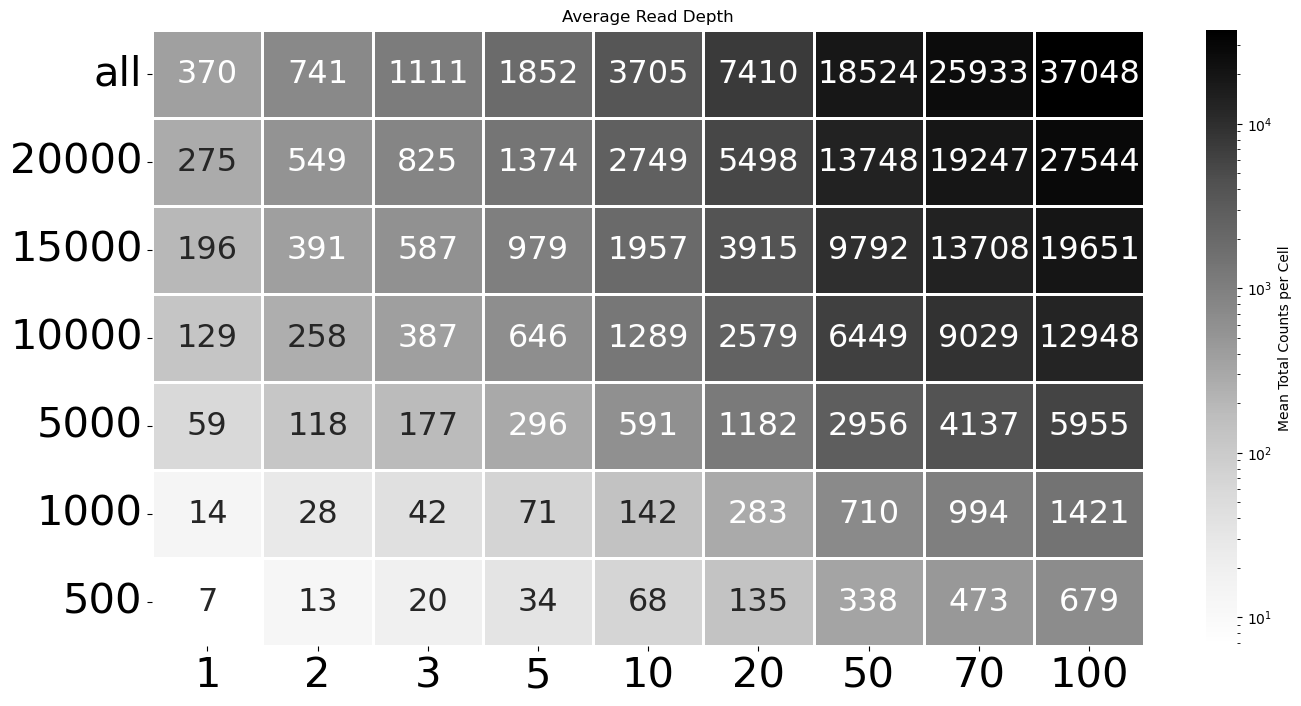

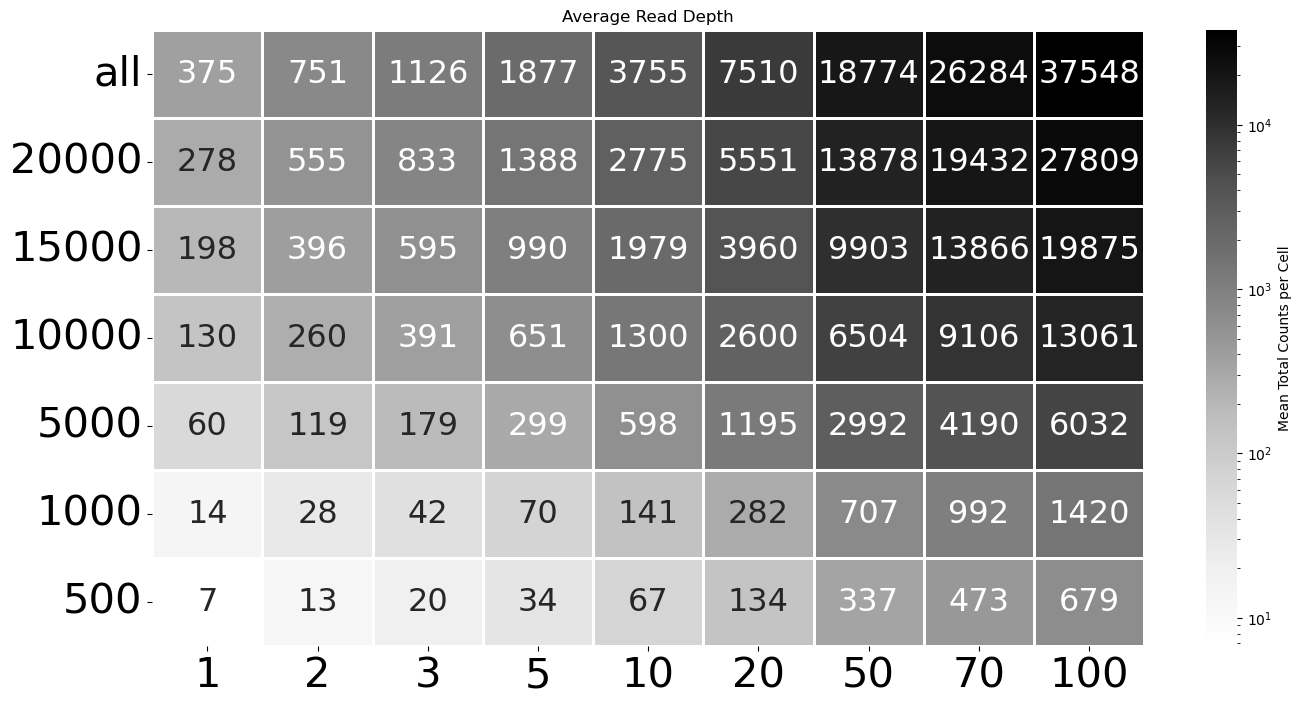

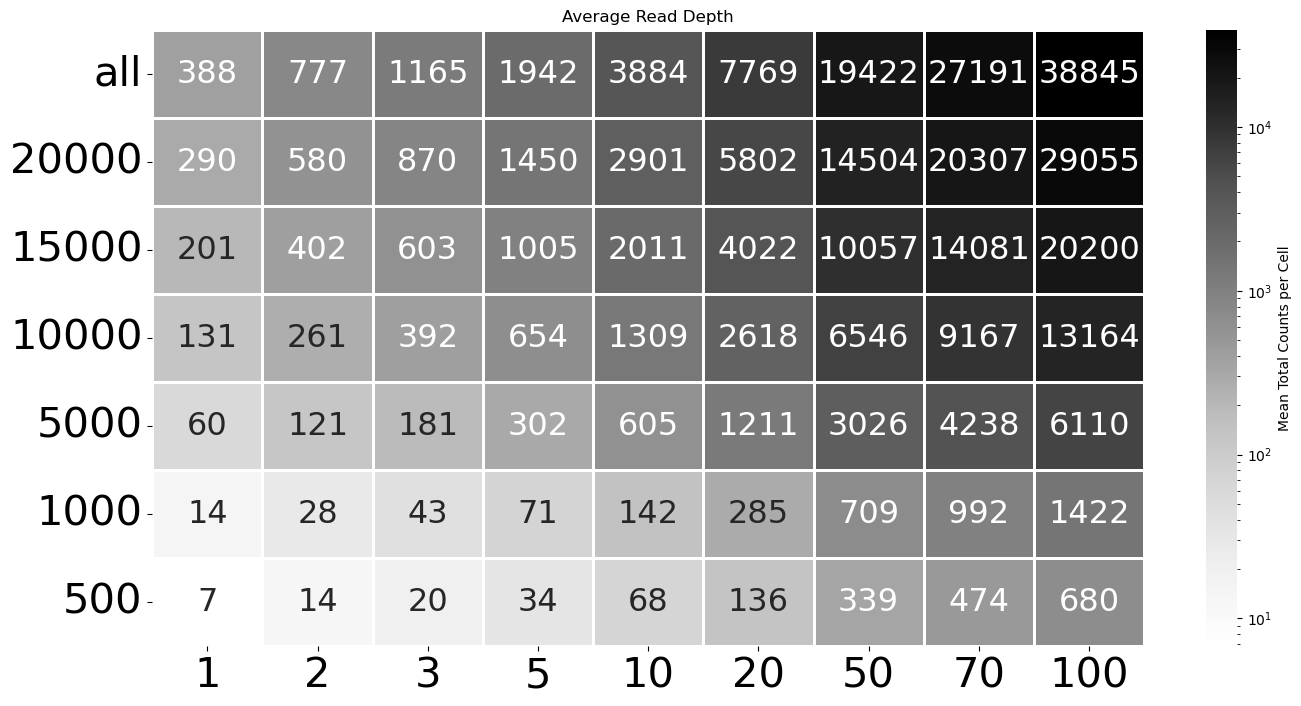

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # ✅ Import LogNorm




# Define the colormap
cmap = sns.color_palette("Greys", as_cmap=True)

for exp in experiments:
    plt.figure(figsize=(16, 8)) 
    total_counts_mean_matrix = pd.read_csv(os.path.expanduser(f'~/SSS_mount/insituCNV/InSituCNV/Figure2/05_Visualize_results/sim0{exp}_total_counts_mean_matrix.csv'), index_col=0)
    sns.heatmap(total_counts_mean_matrix, 
                annot=True, 
                fmt=".0f", 
                cmap=cmap, 
                norm=LogNorm(),  # Use log scaling for color mapping
                cbar_kws={'label': 'Mean Total Counts per Cell'},
                linewidths=1, 
                linecolor='#ffffff', 
                annot_kws={"size": 23}) 
    
    plt.gca().invert_xaxis()
    
    plt.xticks(rotation=0, fontsize=30)  # Reduce x-axis label size
    plt.yticks(rotation=0, fontsize=30)   # Reduce y-axis label size
    
    # Set title with adjusted font size
    plt.title("Average Read Depth", fontsize=12)
    
    # Save the heatmap
    plt.savefig(f"sim0{exp}_heatmap_read_depth_per_lim_conditions.pdf", format='pdf')